<a href="https://colab.research.google.com/github/AwaisAhmad555/computer-vision/blob/master/Multiclass_brain_tumors_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import tensorflow as tf
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
print("Number of GPUs available : ", len(tf.config.list_physical_devices('GPU')))

tf.test.gpu_device_name()

Number of GPUs available :  1


'/device:GPU:0'

### ***Loading Images and performing preprocessing steps***

In [ ]:

glioma_images_path = '/content/drive/MyDrive/brain tumor dataset/Training/glioma_tumor'

meningioma_images_path = '/content/drive/MyDrive/brain tumor dataset/Training/meningioma_tumor'

pituitary_images_path = '/content/drive/MyDrive/brain tumor dataset/Training/pituitary_tumor'

normal_images_path = '/content/drive/MyDrive/brain tumor dataset/Training/no_tumor'

#print(len(os.listdir(normal_images_path)))

training_images = []
training_labels = []

##################################

glioma_images_list = os.listdir(glioma_images_path)

meningioma_images_list = os.listdir(meningioma_images_path)

pituitary_images_list = os.listdir(pituitary_images_path)

normal_images_list = os.listdir(normal_images_path)

##################################



############################## loading Glioma Tumor images #####################################


for glioma_image_name in glioma_images_list:

  #creating full path

  glioma_image_path = os.path.join(glioma_images_path,glioma_image_name)


  #reading image

  glioma_image = cv2.imread(glioma_image_path)


  #resizing image

  glioma_image = Image.fromarray(glioma_image,'RGB')

  glioma_image = glioma_image.resize((256,256))

  glioma_image = np.array(glioma_image)


  # NORMALIZATION of image 

  glioma_image = scaler.fit_transform(glioma_image.reshape(-1, glioma_image.shape[-1])).reshape(glioma_image.shape)

  #storing glioma images in training list
  training_images.append(glioma_image)
  training_labels.append(to_categorical(1,num_classes=4))

  pass



############################## loading Meningioma Tumor images #####################################


for meningioma_image_name in meningioma_images_list:

  #creating full path

  meningioma_image_path = os.path.join(meningioma_images_path,meningioma_image_name)


  #reading image

  meningioma_image = cv2.imread(meningioma_image_path)


  #resizing image

  meningioma_image = Image.fromarray(meningioma_image,'RGB')

  meningioma_image = meningioma_image.resize((256,256))

  meningioma_image = np.array(meningioma_image)


  # NORMALIZATION of image 

  meningioma_image = scaler.fit_transform(meningioma_image.reshape(-1, meningioma_image.shape[-1])).reshape(meningioma_image.shape)

  #storing meningioma images in training list
  training_images.append(meningioma_image)
  training_labels.append(to_categorical(2,num_classes=4))

  pass



############################## loading Pituitary Tumor images #####################################


for pituitary_image_name in pituitary_images_list:

  #creating full path

  pituitary_image_path = os.path.join(pituitary_images_path,pituitary_image_name)


  #reading image

  pituitary_image = cv2.imread(pituitary_image_path)


  #resizing image

  pituitary_image = Image.fromarray(pituitary_image,'RGB')

  pituitary_image = pituitary_image.resize((256,256))

  pituitary_image = np.array(pituitary_image)


  # NORMALIZATION of image 

  pituitary_image = scaler.fit_transform(pituitary_image.reshape(-1, pituitary_image.shape[-1])).reshape(pituitary_image.shape)

  #storing pituitary images in training list
  training_images.append(pituitary_image)
  training_labels.append(to_categorical(3,num_classes=4))

  pass



############################## loading Normal Brain images #####################################


for normal_image_name in normal_images_list:

  #creating full path

  normal_image_path = os.path.join(normal_images_path,normal_image_name)


  #reading image

  normal_image = cv2.imread(normal_image_path)


  #resizing image

  normal_image = Image.fromarray(normal_image,'RGB')

  normal_image = normal_image.resize((256,256))

  normal_image = np.array(normal_image)


  # NORMALIZATION of image 

  normal_image = scaler.fit_transform(normal_image.reshape(-1, normal_image.shape[-1])).reshape(normal_image.shape)

  #storing glioma images in training list
  training_images.append(normal_image)
  training_labels.append(to_categorical(0,num_classes=4))

  pass




In [ ]:
training_images = np.array(training_images)
print(training_images.shape)

training_labels = np.array(training_labels)
print(training_labels.shape)

(2876, 256, 256, 3)
(2876, 4)


### ***Save this images preprocessed data into npz file in order to save time of loading dataset again for future.***

In [ ]:
np.savez_compressed('/content/drive/MyDrive/brain tumor dataset/training.npz', a=training_images,b=training_labels)

### ***LOAD npz file instead of repeating the process of preprocessing***

In [ ]:
path = '/content/drive/MyDrive/brain_tumor_dataset/training.npz'

tumor_dataset = np.load(path)

X = tumor_dataset['a']
print(X.shape)

Y = tumor_dataset['b']
print(Y.shape)

del tumor_dataset

(2876, 256, 256, 3)
(2876, 4)


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2, random_state = 42)

del X,Y

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2300, 256, 256, 3)
(576, 256, 256, 3)
(2300, 4)
(576, 4)


In [ ]:
"""image_width = 256
image_height = 256

training_images_path = '/content/drive/MyDrive/brain tumor dataset/Training'
validation_images_path = '/content/drive/MyDrive/brain tumor dataset/Testing'

print(os.listdir(training_images_path))
print(os.listdir(validation_images_path))"""



# ***Keras Image Data generator***

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
training_samples = X_train.shape[0]
validation_samples = X_test.shape[0]

epochs = 50

batch_size = 16


training_steps_per_epoch = training_samples//batch_size

validation_steps_per_epoch = validation_samples//batch_size

In [ ]:
#Image data generator with image augumentation

"""Training_image_DataGenerator = ImageDataGenerator(rescale=1./255,
                                                  rotation_range=40,
                                                  width_shift_range=0.2,
                                                  height_shift_range=0.2,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True,
                                                  fill_mode='nearest'
                                                  )"""


Training_image_DataGenerator = ImageDataGenerator(rescale=1./255,
                                                  rotation_range=0,
                                                  width_shift_range=0,
                                                  height_shift_range=0,
                                                  shear_range=0,
                                                  zoom_range=0,
                                                  horizontal_flip=False)
                                                  #fill_mode='nearest'
                                                  #)

#Validation_image_DataGenerator = ImageDataGenerator(rescale=1./255)

"""Validation_image_DataGenerator = ImageDataGenerator(rescale=1./255,
                                                  rotation_range=40,
                                                  width_shift_range=0.2,
                                                  height_shift_range=0.2,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True,
                                                  fill_mode='nearest')"""


Validation_image_DataGenerator = ImageDataGenerator(rescale=1./255,
                                                  rotation_range=0,
                                                  width_shift_range=0,
                                                  height_shift_range=0,
                                                  shear_range=0,
                                                  zoom_range=0,
                                                  horizontal_flip=False)
                                                  #fill_mode='nearest')

In [ ]:
"""Training_DataGenerator = Training_image_DataGenerator.flow_from_directory(directory=training_images_path,
                                                                          target_size=(image_width,image_height),
                                                                          batch_size=batch_size,
                                                                          class_mode='categorical'
                                                                          )

Validation_DataGenerator = Validation_image_DataGenerator.flow_from_directory(directory=validation_images_path,
                                                                          target_size=(image_width,image_height),
                                                                          batch_size=batch_size,
                                                                          class_mode='categorical'
                                                                          )"""

Found 2876 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
Training_DataGenerator = Training_image_DataGenerator.flow(X_train,y_train,batch_size = batch_size)

Validation_DataGenerator = Validation_image_DataGenerator.flow(X_test,y_test,batch_size = batch_size)

In [ ]:
image_width = 256
image_height = 256

# ***CUSTOM CNN MODEL***

In [ ]:
from tensorflow.keras.optimizers import Adam
input_shape = (image_width,image_height,3)

In [ ]:
def custom_CNN_model(IMG_HEIGHT=512,IMG_WIDTH=512,IMG_CHANNELS=3,n_classes=4):

  inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

  input_layer = inputs


  Conv_layer_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(input_layer)
  
  Pooling_layer_1 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_1)

  Conv_layer_2 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_1)
  
  Pooling_layer_2 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_2)

  Conv_layer_3 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_2)
  
  Pooling_layer_3 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_3)

  Conv_layer_4 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_3)
  
  Pooling_layer_4 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_4)


  Conv_layer_5 = Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_4)
  
  Pooling_layer_5 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_5)



  flatten_layer = Flatten()(Pooling_layer_5)

  dense_layer_1 = Dense(128,activation='relu',kernel_initializer='he_uniform')(flatten_layer)

  dense_layer_2 = Dense(64,activation='relu',kernel_initializer='he_uniform')(dense_layer_1)

  outputs = Dense(n_classes,activation='softmax')(dense_layer_2)

  model = Model(inputs=[inputs], outputs=[outputs])



  return model
  pass

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#optimizer = Adam(lr=0.001)

model = custom_CNN_model(IMG_HEIGHT=image_height,IMG_WIDTH=image_width,IMG_CHANNELS=3,n_classes=4)


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584

In [ ]:
history = model.fit_generator(generator=Training_DataGenerator,
                    steps_per_epoch=training_steps_per_epoch,
                    epochs=epochs,
                    validation_data=Validation_DataGenerator,
                    validation_steps=validation_steps_per_epoch)

model.save('/content/drive/MyDrive/brain_tumor_dataset/multi_class_brain_tumor_classification.hdf5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
115/115 [==============================] - 25s 95ms/step - loss: 1.2724 - accuracy: 0.3874 - val_loss: 1.0978 - val_accuracy: 0.5643
Epoch 2/50
115/115 [==============================] - 11s 93ms/step - loss: 0.7980 - accuracy: 0.6570 - val_loss: 0.9199 - val_accuracy: 0.5875
Epoch 3/50
115/115 [==============================] - 11s 93ms/step - loss: 0.6430 - accuracy: 0.7252 - val_loss: 0.6296 - val_accuracy: 0.7339
Epoch 4/50
115/115 [==============================] - 11s 94ms/step - loss: 0.4965 - accuracy: 0.8022 - val_loss: 0.5997 - val_accuracy: 0.7321
Epoch 5/50
115/115 [==============================] - 11s 94ms/step - loss: 0.3676 - accuracy: 0.8570 - val_loss: 0.5067 - val_accuracy: 0.8143
Epoch 6/50
115/115 [==============================] - 11s 94ms/step - loss: 0.2640 - accuracy: 0.8996 - val_loss: 0.4612 - val_accuracy: 0.8107
Epoch 7/50
115/115 [==============================] - 11s 94ms/step - loss: 0.1929 - accuracy: 0.9243 - val_loss: 0.5951 - val_accuracy:

### ***Training History Visualization***

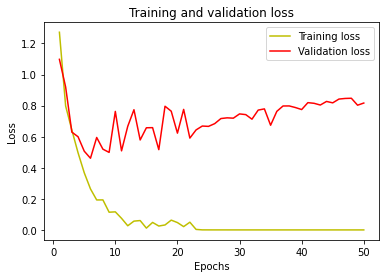

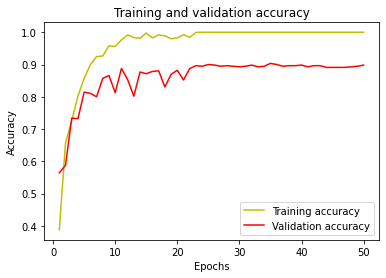

In [ ]:
del X_train , X_test, y_train, y_test

##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

# ***RESNET50 Model Evaluation on Multi class Brain tumor dataset***

In [ ]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(512,512,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
resnet_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
resnet_model.add(Dense(4, activation='softmax'))




In [ ]:
print(resnet_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 24,702,980
Trainable params: 1,115,268
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
resnet_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

resNet_history = resnet_model.fit_generator(generator=Training_DataGenerator,
                    steps_per_epoch=training_steps_per_epoch,
                    epochs=epochs,
                    validation_data=Validation_DataGenerator,
                    validation_steps=validation_steps_per_epoch)


resnet_model.save('/content/drive/MyDrive/brain_tumor_dataset/ResNet50_multi_class_tumor_classification.hdf5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
143/143 [==============================] - 17s 98ms/step - loss: 1.4916 - accuracy: 0.2806 - val_loss: 1.3421 - val_accuracy: 0.3073
Epoch 2/50
143/143 [==============================] - 13s 92ms/step - loss: 1.3592 - accuracy: 0.2837 - val_loss: 1.3435 - val_accuracy: 0.2656
Epoch 3/50
143/143 [==============================] - 13s 92ms/step - loss: 1.3592 - accuracy: 0.2815 - val_loss: 1.3550 - val_accuracy: 0.2656
Epoch 4/50
143/143 [==============================] - 13s 93ms/step - loss: 1.3549 - accuracy: 0.2806 - val_loss: 1.3445 - val_accuracy: 0.2656
Epoch 5/50
143/143 [==============================] - 13s 92ms/step - loss: 1.3557 - accuracy: 0.2750 - val_loss: 1.3510 - val_accuracy: 0.2656
Epoch 6/50
143/143 [==============================] - 13s 92ms/step - loss: 1.3526 - accuracy: 0.3030 - val_loss: 1.3576 - val_accuracy: 0.2656
Epoch 7/50
143/143 [==============================] - 13s 92ms/step - loss: 1.3555 - accuracy: 0.2916 - val_loss: 1.3487 - val_accuracy:

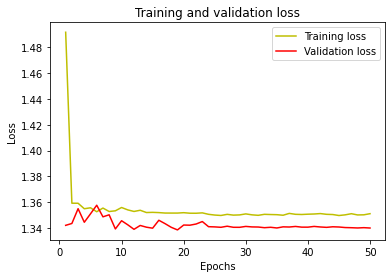

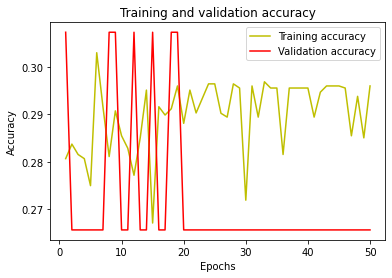

In [ ]:
del X_train , X_test, y_train, y_test
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = resNet_history.history['loss']
val_loss = resNet_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = resNet_history.history['accuracy']
val_acc = resNet_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
"""for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	
	# plot raw pixel data
	plt.plot(epochs, acc, 'y', label='title')
  plt.set_title(" " + str(i))
# show the figure
plt.show()"""

# ***InceptionV3 Model Evaluation on Multi Class Brain tumor dataset***

In [ ]:
pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(512,512,3),
    pooling='avg',
    classes=2,
)



for layer in pretrained_model.layers:
        layer.trainable=False

InceptionV3_model = Sequential()

InceptionV3_model.add(pretrained_model)
InceptionV3_model.add(Flatten())
InceptionV3_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
InceptionV3_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
InceptionV3_model.add(Dense(4, activation='softmax'))

print(InceptionV3_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 22,918,052
Trainable params: 1,115,268
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [ ]:
InceptionV3_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

InceptionV3_history = InceptionV3_model.fit_generator(generator=Training_DataGenerator,
                    steps_per_epoch=training_steps_per_epoch,
                    epochs=epochs,
                    validation_data=Validation_DataGenerator,
                    validation_steps=validation_steps_per_epoch)

InceptionV3_model.save('/content/drive/MyDrive/brain tumor dataset/InceptionV3_multi_class_tumor_classification.hdf5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
143/143 [==============================] - 28s 84ms/step - loss: 1.1965 - accuracy: 0.4514 - val_loss: 1.0725 - val_accuracy: 0.5295
Epoch 2/50
143/143 [==============================] - 10s 69ms/step - loss: 0.9725 - accuracy: 0.5665 - val_loss: 0.9691 - val_accuracy: 0.5278
Epoch 3/50
143/143 [==============================] - 10s 69ms/step - loss: 0.8865 - accuracy: 0.6086 - val_loss: 0.9062 - val_accuracy: 0.5799
Epoch 4/50
143/143 [==============================] - 11s 74ms/step - loss: 0.8557 - accuracy: 0.6239 - val_loss: 0.9312 - val_accuracy: 0.5625
Epoch 5/50
143/143 [==============================] - 10s 70ms/step - loss: 0.8045 - accuracy: 0.6384 - val_loss: 0.9750 - val_accuracy: 0.5573
Epoch 6/50
143/143 [==============================] - 10s 70ms/step - loss: 0.7565 - accuracy: 0.6813 - val_loss: 0.7790 - val_accuracy: 0.6580
Epoch 7/50
143/143 [==============================] - 10s 69ms/step - loss: 0.7311 - accuracy: 0.6878 - val_loss: 0.7913 - val_accuracy:

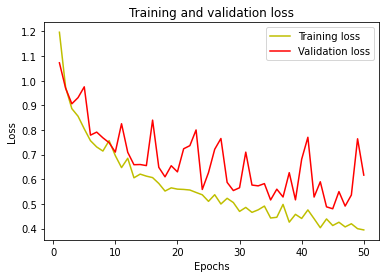

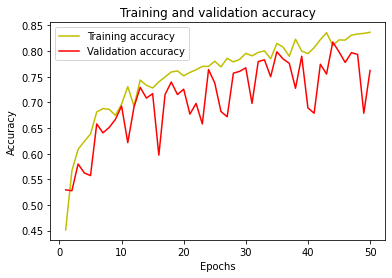

In [ ]:
del X_train , X_test, y_train, y_test

##################################################################


#plot the training and validation IoU and loss at each epoch
loss = InceptionV3_history.history['loss']
val_loss = InceptionV3_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = InceptionV3_history.history['accuracy']
val_acc = InceptionV3_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ***VGG16 Model Evaluation on Multi Class Brain tumor dataset***

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(512,512,3),
    pooling="avg",
    classes=2,
)

for layer in base_model.layers:
        layer.trainable=False

VGG16_model = Sequential()

VGG16_model.add(base_model)
VGG16_model.add(Flatten())
VGG16_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dense(4, activation='softmax'))

print(VGG16_model.summary())

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15,043,524
Trainable params: 328,836
Non-trainable params: 14,714,688
_______________________________________

In [ ]:
VGG16_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

VGG16_history = VGG16_model.fit_generator(generator=Training_DataGenerator,
                    steps_per_epoch=training_steps_per_epoch,
                    epochs=epochs,
                    validation_data=Validation_DataGenerator,
                    validation_steps=validation_steps_per_epoch)


VGG16_model.save('/content/drive/MyDrive/brain tumor dataset/VGG16_multi_class_tumor_classification.hdf5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
143/143 [==============================] - 33s 140ms/step - loss: 1.4000 - accuracy: 0.2758 - val_loss: 1.3548 - val_accuracy: 0.2656
Epoch 2/50
143/143 [==============================] - 19s 130ms/step - loss: 1.3722 - accuracy: 0.2929 - val_loss: 1.3408 - val_accuracy: 0.3073
Epoch 3/50
143/143 [==============================] - 19s 131ms/step - loss: 1.3676 - accuracy: 0.2732 - val_loss: 1.3668 - val_accuracy: 0.2656
Epoch 4/50
143/143 [==============================] - 19s 129ms/step - loss: 1.3561 - accuracy: 0.2806 - val_loss: 1.3390 - val_accuracy: 0.3021
Epoch 5/50
143/143 [==============================] - 19s 130ms/step - loss: 1.3561 - accuracy: 0.2780 - val_loss: 1.3396 - val_accuracy: 0.2656
Epoch 6/50
143/143 [==============================] - 19s 132ms/step - loss: 1.3562 - accuracy: 0.2785 - val_loss: 1.3488 - val_accuracy: 0.2656
Epoch 7/50
143/143 [==============================] - 19s 131ms/step - loss: 1.3546 - accuracy: 0.2855 - val_loss: 1.3448 - val_ac

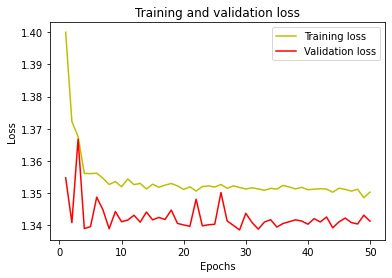

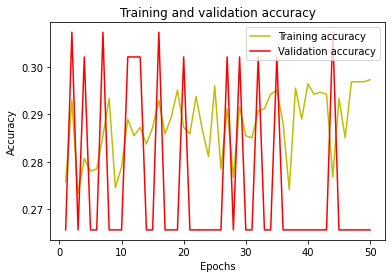

In [ ]:
del X_train , X_test, y_train, y_test
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = VGG16_history.history['loss']
val_loss = VGG16_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = VGG16_history.history['accuracy']
val_acc = VGG16_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()